# Lab 02 &mdash; Python Libraries
(some content adapted from University of Michigan's Coursera [Statistics with Python Specialization](https://www.coursera.org/specializations/statistics-with-python) and [Open Intro labs](https://www.openintro.org/stat/labs.php))

Main libraries for this course:

* **Pandas**: Data manipulation and analysis. Works on top of numpy &mdash; [Cheatsheet 1](https://www.datacamp.com/community/blog/python-pandas-cheat-sheet), [Cheatsheet 2](https://www.datacamp.com/community/blog/pandas-cheat-sheet-python)

* **SciPy**: fundamental library for numerical and scientific computing &mdash; [Cheatsheet](https://www.datacamp.com/community/blog/python-scipy-cheat-sheet)

* **Matplotlib**: for plotting graphs &mdash; [Cheatsheet](https://www.datacamp.com/community/blog/python-matplotlib-cheat-sheet)

* **Seaborn**: a higher-level interface to Matplotlib that can be used to simplify many graphing tasks.

* **Statsmodels**: a library that implements many statistical analysis and inference techniques. 

NumPy, Pandas, SciPy, and Matplotlib are all part of the [SciPy open-source project](https://www.scipy.org/index.html), which also includes **IPython**, the kernel behind Jupyter.

## Roadmap
* [Data management with Pandas](#Data-management-with-Pandas)
* [Plotting with MatPlotLib and Seaborn](#Plotting-with-MatPlotLib-and-Seaborn)
* [scipy stats](#Intro-to-scipy.stats)
    * [Continuous and discrete distributions](#Continuous-and-discrete-distributions)
        * [Area under the pdf](#Area-under-the-pdf)
    * [Parameters and statistics](#Parameters-and-statistics)
    * [Multivariate distributions](#Multivariate-distributions)

## Data management with Pandas

* We will use the pandas library to import, view, and transform the data. 
* The main data structure that Pandas works with is called a **Data Frame**.  This is a two-dimensional table of data where rows typically represent observations and the columns represent variables (similar to R's data frame)
    * Pandas also has a one-dimensional data structure called a **Series**, i.e., a single column of a Data Frame.
* Pandas provide a lot of the data manipulation and analysis functionalities of R. Hence, if you're more familiar with R, look at the [Comparison with R](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_r.html) webpage of Panda's docs

We will start with looking into data of *CDC's Behavioral Risk Factor Surveillance System (BRFSS) survey*. It is an annual telephone survey of 350,000 people in the United States designed to identify risk factors in the adult population and report emerging health trends. For example, it includes data on diet, physical activity, HIV/AIDS status, and tobacco use. We consider the data made available by Open Intro at https://www.openintro.org/stat/data/?data=cdc, which is a random sample of 20,000 people from the 2000's survey, and includes a small subset of the variables. 

See the CDC web site (http://www.cdc.gov/brfss) for more details

In [1]:
import numpy as np
import pandas as pd

# read the csv file and store it into pd dataframe
# replace with correct path
# df = pd.read_csv("https://moodle.royalholloway.ac.uk/mod/resource/view.php?id=451993")
df = pd.read_csv("cdc.csv")

# Head function to see a preview of the top-most rows
df.head()

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,good,0,1,0,70,175,175,77,m
1,good,0,1,1,64,125,115,33,f
2,good,1,1,1,60,105,105,49,f
3,good,1,1,0,66,132,124,42,f
4,very good,0,1,0,61,150,130,55,f


In [2]:
# Tail function to see a preview of the bottom-most rows
df.tail()

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
19995,good,1,1,0,66,215,140,23,f
19996,excellent,0,1,0,73,200,185,35,m
19997,poor,0,1,0,65,216,150,57,f
19998,good,1,1,0,67,165,165,81,f
19999,good,1,1,1,69,170,165,83,m


In [3]:
# The dtypes attribute gives the column (variable) types
print(df.dtypes)

genhlth     object
exerany      int64
hlthplan     int64
smoke100     int64
height       int64
weight       int64
wtdesire     int64
age          int64
gender      object
dtype: object


* Before, we used `read_csv` to load a csv file into a pandas data frame. 
* Similarly, we save a data frame into a file by calling the `to_csv` function
* Analogous functions exist for other file types, see [pandas I/O API](https://pandas.pydata.org/pandas-docs/stable/reference/io.html)

In [4]:
df.to_csv("cdc.csv")

### Slicing and indexing
* Indexing works with a very similar syntax as numpy arrays
* Two main functions: `loc`, which uses labels; `iloc`, which uses indices

In [5]:
# select only the weight column (and all rows)
weight = df.loc[:,"weight"]
print(weight)
type(weight) # a series

0        175
1        125
2        105
3        132
4        150
5        114
6        194
7        170
8        150
9        180
10       186
11       168
12       185
13       170
14       170
15       185
16       156
17       185
18       200
19       125
20       200
21       160
22       160
23       165
24       105
25       190
26       190
27       160
28       115
29       185
        ... 
19970    168
19971     85
19972    145
19973    110
19974    156
19975    230
19976    198
19977    180
19978    135
19979    265
19980    195
19981    210
19982    171
19983    190
19984    180
19985    120
19986    140
19987    200
19988    230
19989    230
19990    195
19991    210
19992    180
19993    165
19994    224
19995    215
19996    200
19997    216
19998    165
19999    170
Name: weight, Length: 20000, dtype: int64


pandas.core.series.Series

In [6]:
# select three columns and rows with labels 0 to 7
df.loc[0:7, ["weight","hlthplan","age"]]
test = df.loc[0:7, ["weight","hlthplan","age"]]

Note what we did above: we didn't select the indexes `0:7`, but the rows labelled by `0,1,...,7`. 
* when speaking of indices, `0:7` selects `0,...,6`

In [7]:
# or you can keep all columns and select some of the rows
df.loc[1000:1010]

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
1000,good,1,1,0,69,210,170,27,f
1001,good,1,0,0,76,295,270,29,m
1002,good,1,1,1,70,260,200,52,m
1003,excellent,1,1,0,72,165,175,39,m
1004,very good,1,1,1,62,115,115,80,f
1005,very good,1,1,0,62,180,140,26,f
1006,excellent,0,1,0,69,180,170,46,m
1007,excellent,1,1,0,66,126,126,20,f
1008,fair,1,1,0,59,112,107,60,f
1009,good,1,1,0,63,135,135,39,f


`iloc` is the same as `loc` but uses integer indexing
* `m:n` selects all indices from `m` to `n` *excluded*

In [8]:
# iloc is the same but uses integer indices for columns
# select the first 10 rows and the first two columns
df.iloc[0:10,0:2]

,genhlth,exerany
0,good,0
1,good,0
2,good,1
3,good,1
4,very good,0
5,very good,1
6,very good,1
7,very good,0
8,good,0
9,good,1


### Slicing and indexing &mdash; shortcuts

In [9]:
# equivalent to df.iloc[0:10] -- selects first 10 rows
df[0:10]

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,good,0,1,0,70,175,175,77,m
1,good,0,1,1,64,125,115,33,f
2,good,1,1,1,60,105,105,49,f
3,good,1,1,0,66,132,124,42,f
4,very good,0,1,0,61,150,130,55,f
5,very good,1,1,0,64,114,114,55,f
6,very good,1,1,0,71,194,185,31,m
7,very good,0,1,0,67,170,160,45,m
8,good,0,1,1,65,150,130,27,f
9,good,1,1,0,70,180,170,44,m


In [10]:
# equivalent to df.loc[:,["smoke100","weight"]]
df[["smoke100","weight"]].head()

,smoke100,weight
0,0,175
1,1,125
2,1,105
3,0,132
4,0,150


In [11]:
# selects the first 7 elements of column `smoke100'
df.smoke100[0:7]

0    0
1    1
2    1
3    0
4    0
5    0
6    0
Name: smoke100, dtype: int64

### Select by condition

* Similarly to numpy array, we can select rows of a dataframe using conditions on variables.
* Same mechanism of mupy: we generate Boolean series that correspond to the result of our query 

In [12]:
# select all the females
females = df.gender == 'f'

# select all people older than 30
over30 = df.age > 30

# select from the original dataframe only the 30+ yo women
df[females & over30].head()

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
1,good,0,1,1,64,125,115,33,f
2,good,1,1,1,60,105,105,49,f
3,good,1,1,0,66,132,124,42,f
4,very good,0,1,0,61,150,130,55,f
5,very good,1,1,0,64,114,114,55,f


In [13]:
# note that selection by condition can be done inline
# the code below selects all men whose desired weight 
#     is lower than 80% of their actual weight
df[(df.gender=='m') & (df.wtdesire < df.weight*0.8)].head()

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
90,fair,1,1,1,71,265,165,46,m
120,very good,0,1,0,67,280,200,22,m
138,very good,1,1,0,68,250,185,44,m
178,excellent,0,1,1,70,235,175,56,m
278,very good,1,1,0,76,330,250,38,m


The `unique` function returns the unique values of a given column. 

In [14]:
# return the unique values of genhlth
df.genhlth.unique()

array(['good', 'very good', 'excellent', 'fair', 'poor'], dtype=object)

In [15]:
pd.isnull(df).sum()

genhlth     0
exerany     0
hlthplan    0
smoke100    0
height      0
weight      0
wtdesire    0
age         0
gender      0
dtype: int64

### Descriptive statistics

When dealing with large data sets, like the BRFSS questionnaire, a preliminary analysis can be to look into summary statistics (e.g., mean, standard deviation, etc)
* Panda's `describe` function returns a summary of these statistics (similar to R's `summary`). See [docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
* Let's use it to compute some sample statistics for our case study

In [16]:
# see summary statistics of weight column
# it returns count, mean, std, min/max, and 25%,50%,75% percentiles
df.weight.describe()

count    20000.00000
mean       169.68295
std         40.08097
min         68.00000
25%        140.00000
50%        165.00000
75%        190.00000
max        500.00000
Name: weight, dtype: float64

In [17]:
# to know specific percentiles, specify them as first argument
# here we ask for the 10%,20%,...,90%
pctls = np.arange(0.1, 1, 0.1)
df.weight.describe(pctls)

count    20000.00000
mean       169.68295
std         40.08097
min         68.00000
10%        124.00000
20%        135.00000
30.0%      145.00000
40%        155.00000
50%        165.00000
60%        175.00000
70%        185.00000
80%        200.00000
90%        220.00000
max        500.00000
Name: weight, dtype: float64

One can obtain individual statistics by calling the functions `mean`, `std`, `max`, `min`, etc

In [18]:
print(df.weight.mean())
print(df.weight.std())
print(df.weight.max())
print(df.weight.min())
print(df.weight.count())

169.68295
40.080969967120254
500
68
20000


### Contingency tables 

* Recall: contingency tables are a way of showing multi-variate categorical data
    * they show counts/frequencies w.r.t. all possible combination of two or more variables
* In pandas, we use the function `crosstab`


Let's now look at the contingency table of variables `smoke100` (whether participant smoked 100 cigarettes in their lifetime) and `exerany` (whether they exercised in the last month)

In [19]:
smoke_vs_exercise = pd.crosstab(index=df.smoke100, columns=df.exerany)
smoke_vs_exercise

exerany,0,1
smoke100,,
0,2543,8016
1,2543,6898


* To obtain the frequency (aka empirical) distribution, just set parameter `normalize=True`
* To show marginals (i.e., partial counts/frequencies), set `margins=True`

In [20]:
# normalize to frequencies
smoke_vs_exercise = pd.crosstab(index=df.smoke100, columns=df.exerany, normalize=True)
smoke_vs_exercise

exerany,0,1
smoke100,,
0,0.12715,0.4008
1,0.12715,0.3449


In [21]:
# normalize to frequencies and show marginals
pd.crosstab(index=df.smoke100, columns=df.exerany, normalize=True, margins=True)

exerany,0,1,All
smoke100,,,
0,0.12715,0.4008,0.52795
1,0.12715,0.3449,0.47205
All,0.25430,0.7457,1.00000


## Plotting with MatPlotLib and Seaborn

* MatPlotLib is one of the main plotting libraries for Python
* The `pyplot` module of MatPlotLib provides features similar to MATLAB's plotting interface
    * including barplots, scatterplots, lineplots, etc
* Seaborn is based on MatPlotLib, but provides a simpler interface for statistical data visualization
* Let's look at `pyplot` first

In [24]:
# plt is the default alias for pyplot 
import matplotlib.pyplot as plt
# below is an 'IPython magic function' that ensures 
# correct visualization of plots in jupyter notebooks
%matplotlib inline

# let's do a barplot of the frequencies of smoke100
# we can re-use our previous contingency table and
#     compute marginals by column-wise sum
smoke = np.sum(smoke_vs_exercise, axis=1)
smoke

smoke100
0    0.52795
1    0.47205
dtype: float64

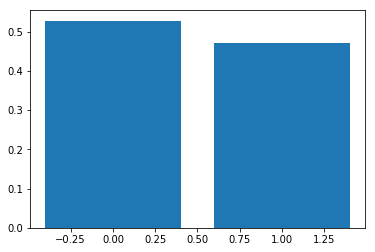

In [23]:
# plots a bar plot where [0,1] are the x-coordinates 
#     and the height of the bars are given by `smoke`
plt.bar([0,1], smoke)
plt.show()

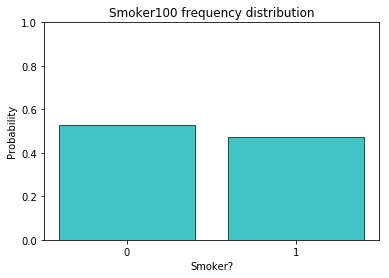

In [25]:
# let's improve its looks:
# change colors, set x and y labels, title, y ranges, x ticks
plt.bar([0,1], smoke, color='#44C3C4', edgecolor='#1C5152')
plt.title('Smoker100 frequency distribution')
plt.xlabel('Smoker?')
plt.ylabel('Probability')
plt.xticks([0,1])
plt.ylim([0,1])
plt.show()

### Plotting with Seaborn

#### Histograms and countplots
* `distplot` creates a frequency histogram directly from the variable
* `countplot` does the same but reports counts (instead of frequencies)

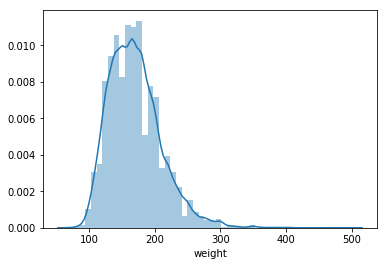

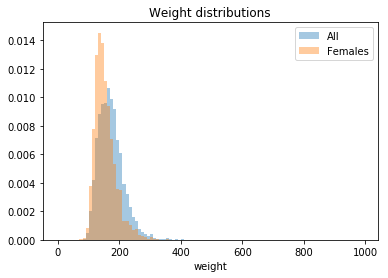

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# create frequency histogram for weight
sns.distplot(df.weight)
# note that we still call show() from pyplot
plt.show()

# create a slightly modified version with manual bins
#     and without the smooth approximation of the frequencies,
#     i.e., kernel density estimation (kde=False)
sns.distplot(df.weight, bins=np.arange(0,1000,10), kde=False, norm_hist=True)
# when setting kde=False, you need to specify norm_hist=True 
#     to plot frequencies instead of counts

# plot alongside the weights of females
f_weights = df.weight[df.gender=='f']
sns.distplot(f_weights, bins=np.arange(0,1000,10), kde=False, norm_hist=True)

# being on top of matplotlib we can use previous commands to modify legend, title, etc
plt.title('Weight distributions')
plt.legend(['All', 'Females'])
plt.show()

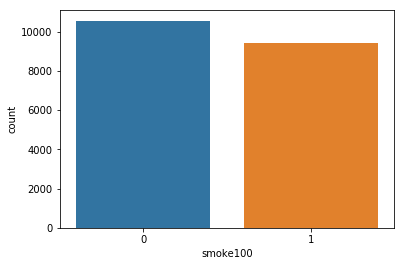

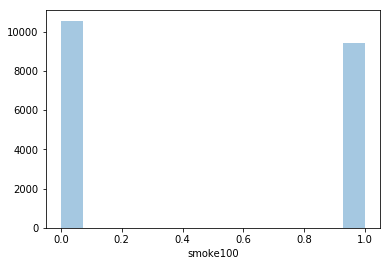

In [27]:
# the syntax for the count plot is slightly different

# do a countplot for smoke100
sns.countplot(x='smoke100', data=df)
plt.show()

# as we saw before, we can do count plots with distplot, 
#     but this looks not as nice
sns.distplot(df.smoke100,kde=False, norm_hist=False)
plt.show()

#### Scatterplots and bivariate data
* `scatterplot`, and 
* `jointplot` &mdash; more "complete" as it shows scatterplot and histograms for marginals
    * it has options to show linear regression fit, and kde
* In "plain" `pyplot`, the function is `plt.scatter`

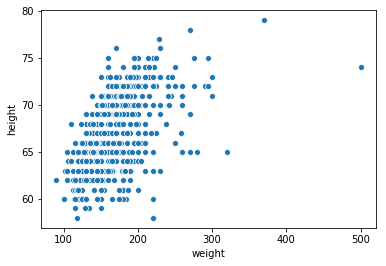

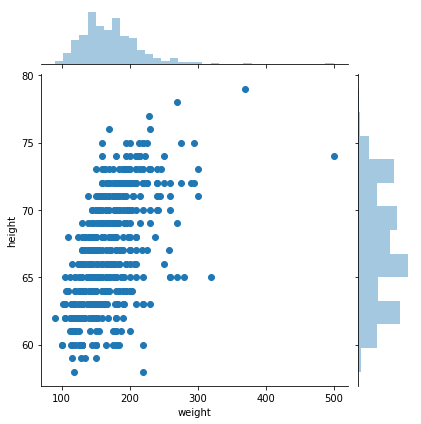

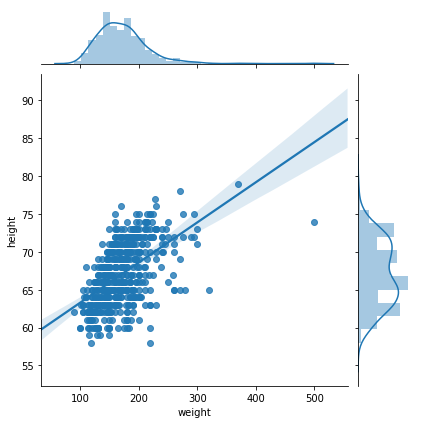

In [28]:
# select a random subset of the dataframe to better appreciate the plot
#     using pandas' sample function (sample 500 observations)
df_sample = df.sample(n=500)

# apply scatterplot to weights and heights
sns.scatterplot(x="weight", y="height", data=df_sample)
plt.show()

# apply jointplot to weights and heights
sns.jointplot(x="weight", y="height", data=df_sample)
plt.show()

# now use the kind=reg parameter to show linear regression fit
# we can see that there is a positive association
# (transparent band indicate 95% confidence interval)
sns.jointplot(x="weight", y="height", data=df_sample, kind='reg')
plt.show()

## Intro to scipy.stats

Here we will introduce and use the module `scipy.stats` of the SciPy library (see [docs](https://docs.scipy.org/doc/scipy/reference/stats.html)) which contains a large number of continuous and discrete distributions and statistical functions.

## Continuous and discrete distributions

* `scipy.stats` builds on two main classes: `rv_continuous` and `rv_discrete` which describe a generic continuous/discrete random variable. 
* all `scipy.stats` distributions are instances of `rv_continuous` and `rv_discrete`
* `rv_continuous` and `rv_discrete` contain functions to draw random samples (function `rvs`), compute values of pdf/cdf/inverse cdf (functions `pdf`, `cdf`, `ppf`), as well as distribution parameters

We will see `scipy.stats` in action on the normal distribution, a continuous one, and the binomial distribution, a discrete one.

In [29]:
import numpy as np
from scipy import stats

# draw and print 10 random observations from the standard normal distribution N(0,1)
# we call the rvs function on the stats.norm object
sample_1 = stats.norm.rvs(size = 10)
print(sample_1)

# to set different mu and sigma, we use the parameters 'loc' (location) and 'scale'
# below we draw and print 10 random observations from N(10,3)
mu = 10
stdev = 3
sample_2 = stats.norm.rvs(loc=mu, scale=stdev, size = 10)
print(sample_2)

[-0.45554312 -0.45583271  2.25386694 -0.33311504 -1.69833681 -0.47514889
 -0.00540093  1.04912006 -0.25663936 -0.26453285]
[10.52327686  9.17314921  9.16972082  9.07552478  9.66273958  8.44969309
 10.65382038  8.16906546  8.63437901  6.67937138]


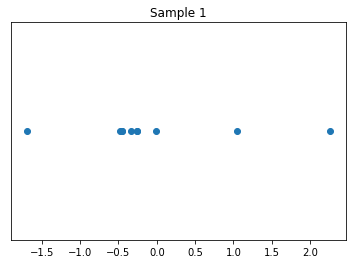

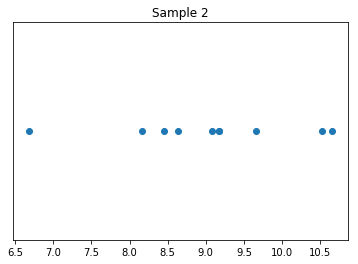

In [30]:
# we can use dotplots to visualize these random samples
# we don't need seaborn, this can be done easily in pyplot
import matplotlib.pyplot as plt

# a dotplot is a scatterplot where x = sample values, and 
#     y = 0 (or any other constant, it doesn't matter)
plt.scatter(sample_1, np.zeros(sample_1.shape))
plt.title('Sample 1')
# since y axis doesn't matter, we hide them as follows
# we first get the current axis instance (after plot creation)
ax = plt.gca()
# then, we hide the y component
ax.get_yaxis().set_visible(False)
# finally, show the plot
plt.show()

# repeat for sample 2
plt.scatter(sample_2, np.zeros(sample_2.shape))
plt.title('Sample 2')
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.show()

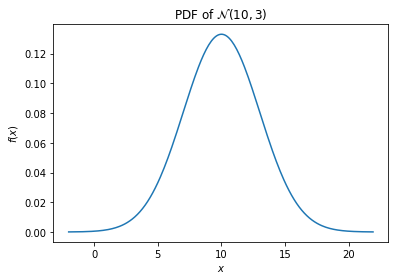

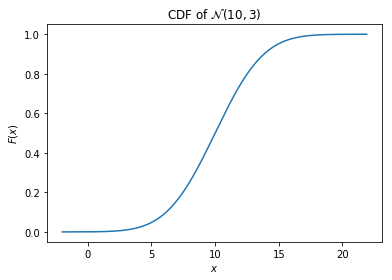

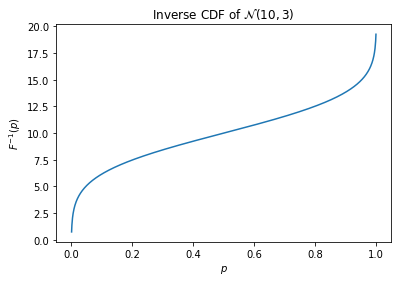

In [31]:
# let's now plot the pdf, cdf, and inverse cdf of N(10,3)

# first build an array of points to plot the pdf/cdf for
#     the normal has infinite support, so we consider between 
#     -4 and +4 st.dev. around the mean
x = np.arange(mu-4*stdev, mu+4*stdev, 0.1)

# compute corresponding pdf and cdf values
x_pdf = stats.norm.pdf(x, loc=mu, scale=stdev)
x_pdf = stats.norm(loc=mu, scale=stdev).pdf(x) 
x_cdf = stats.norm.cdf(x, loc=mu, scale=stdev)

# for simple lineplots, we can directly use pyplot and not seaborn
plt.plot(x, x_pdf)
# note that we can use LaTeX for nice-looking math!
plt.title('PDF of $\mathcal{N}(10,3)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

plt.plot(x, x_cdf)
plt.title('CDF of $\mathcal{N}(10,3)$')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.show()

# the domain of the percentile (ppf) function is a probability value
#     (being the inverse of the cdf)
# note also that the ppf evaluated at exactly 1 or 0 returns ±infty 
#     (recall Gaussian has infinite support). 
# So we choose slightly smaller probability values
probs = np.arange(0.001, 1, 0.001)
plt.plot(probs, stats.norm.ppf(probs, loc=mu, scale=stdev))
plt.title('Inverse CDF of $\mathcal{N}(10,3)$')
plt.xlabel('$p$')
plt.ylabel('$F^{-1}(p)$')
plt.show()

We can also "freeze" the distribution to fix shape and location (to avoid re-entering them every time), as follows

In [32]:
# freeze distribution with mu and stdev
my_norm = stats.norm(loc=mu, scale=stdev)
print(my_norm.rvs(size=10))

[12.53115735 13.22151262 10.1246944  14.64832204 13.99316769 13.59475347
 14.1090266  15.92935514  9.73047966 14.8351724 ]


Let's now move to an example of the binomial, a discrete distribution

Let's consider an example on ML accuracy: we are evaluating a ML classifier for brain tumours over 100 random images. The claimed accuracy of the classifier is $85\%$. What's the probability that the total number of correctly classified images is at most 75?
* We know that the number $X$ of images correctly classified over 100 images (trials) follows a binomial distribution, $X \sim B(100,0.85)$ (each image classification is a Bernoulli trial)
* We can compute $P(X\leq 75)$

In [33]:
# we can simply use the true CDF of the binomial
n = 100
p = 0.85
p_leq_75 = stats.binom.cdf(75, n, p)

print(p_leq_75)

0.006080408590142886


In [34]:
# let's now freeze our binomial, but in a way that remains 
#     parametric w.r.t. 'n'. 
# We can use Python's lambdas

MLacc_rv = lambda n : stats.binom(n,p)
# this code is equivalent to the above
print(MLacc_rv(n).cdf(75))

0.006080408590142886


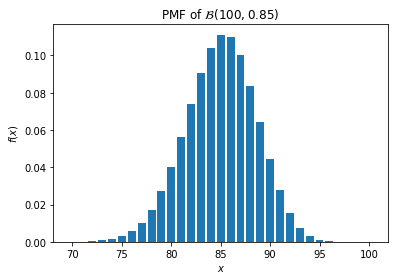

In [35]:
# let's also plot the pmf of the binomial
# recall it's a discrete variable, the support is {0,1,...,n}
# being discrete, we can use a barplot, using pyplot bar function

# since the probabilities below 70 are negligible, 
#     let's consider an upper subset of the support
x = np.arange(70, n+1, 1)

plt.bar(x, MLacc_rv(n).pmf(x))
plt.title('PMF of $\mathcal{B}(100,0.85)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

### Area under the pdf
* During the class, we saw some (nice) plots of pdfs with filled areas to indicate cumulative probability values
* Here is some code to reproduce those plots
* We'll use again the Normal distribution, but any other would work as well

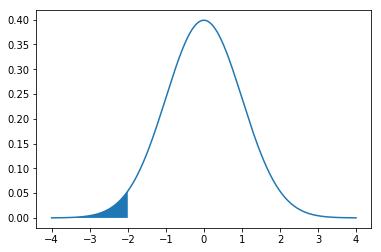

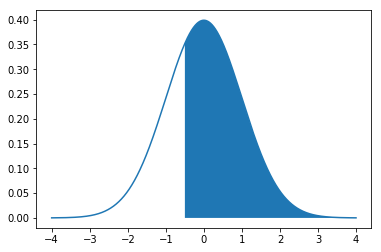

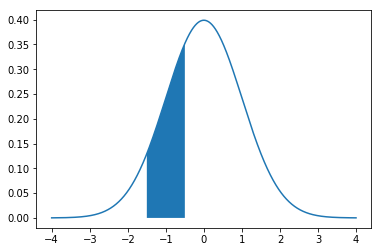

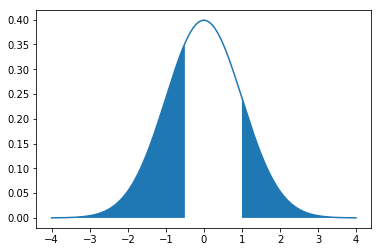

In [36]:
# use the standard N(0,1)
# values to compute the pdf for
x = np.arange(-4, 4, 0.001)

# select the points to fill using a Boolean condition.
# suppose we want to fill the area below -2 stdevs about the mean
#     in order to highlight P(X<=-2)
cond_1 = x <= -2
# the result is a Boolean array

# first, plot the pdf for x
y = stats.norm.pdf(x)
plt.plot(x, y)
# then, fill the area based on cond_1 using pyplot's fill_between
plt.fill_between(x, 0, y, where=cond_1)
plt.show()

# let's now try with other conditions
# P(X>=-0.5)
cond_2 =  x >= -0.5
plt.plot(x, y)
plt.fill_between(x, 0, y, where=cond_2)
plt.show()

# P(-1.5<=X<=-0.5)
cond_3 = (x >= -1.5) & (x <= -0.5)
plt.plot(x, y)
plt.fill_between(x, 0, y, where=cond_3)
plt.show()

# P(X<=-0.5 or X>=1)
cond_4 =  (x <= -0.5) | (x >= 1)
plt.plot(x, y)
plt.fill_between(x, 0, y, where=cond_4)
plt.show()


## Parameters and statistics

`scipy.stats` supports computation of sample statistics as well as distribution parameters

In [37]:
# derive parameters of our previously defined normal distribution
# mean
print(my_norm.mean())
# median 
print(my_norm.median())
# variance
print(my_norm.var())

10.0
10.0
9.0


A very nice feature is that `scipy.stats` allows computing the expected value of any function using the distribution's pdf by numerical integration.
* i.e., given any function $h$, it computes $\mathbb{E}[h] = \int h(x)\cdot f(x) dx$, given a pmf/pdf $f$
* done via `expect` function

We know that the variance of a distribution is the expected value of the squared deviation from the mean. 
* Let's re-derive variance using only the mean and the `expect` function

In [38]:
# define the function to integrate 
# (squared deviation from the mean)
h = lambda x: (x-mu)**2

# the result is "almost" 9
print(my_norm.expect(h))
# the difference (5e-15) is just due to 
#     numerical integration precision
print(my_norm.var()-my_norm.expect(h))

8.999999999999995
5.329070518200751e-15


Sample statistics are derived with `describe` function (similarly to pandas)

In [39]:
# draw a sample of 30 fair coin tosses (~Bernoulli(0.5))
tosses = stats.bernoulli(0.5).rvs(size=10000)

# invoke `describe` function of scipy.stats to have 
#     an overall picture of sample statistics
print(stats.describe(tosses))

# or we can compute some individual statistics 
#     using numpy's functions
print('Mean: '+str(tosses.mean()))
print('Variance: '+str(tosses.var()))
# or using scipy.stats functions
print('Skewness: '+str(stats.skew(tosses)))

DescribeResult(nobs=10000, minmax=(0, 1), mean=0.4959, variance=0.250008190819082, skewness=0.016400551395806894, kurtosis=-1.9997310219139142)
Mean: 0.4959
Variance: 0.24998319000000005
Skewness: 0.016400551395806894


## Multivariate distributions 

* Let's now return to the example of the *CDC's Behavioral Risk Factor Surveillance System (BRFSS) survey*
* Let's add a variable to our dataframe, *BMI_class*, which describes to which of the categories obese, overweigth, normal, underweight the participant belongs to. 
    * The categories are computed based on the body mass index (see [wiki page](https://en.wikipedia.org/wiki/Body_mass_index))
* We want to derive and analyse the empirical joint distribution of exerany and BMI_class to see if there are statistical relationships between exercise and BMI_class

In [40]:
import pandas as pd

# df = pd.read_csv("https://moodle.royalholloway.ac.uk/mod/resource/view.php?id=451993")
df = pd.read_csv("cdc.csv")
# compute the bmi (formula that works with weight in lb and height in inches)
BMIs = (df.weight / df.height**2) * 703

# generate a categorical datatype for bmi_class
from pandas.api.types import CategoricalDtype

bmi_class_type = CategoricalDtype(
    categories=["under", "normal", "over", "obese"], ordered=True)

# transform bmi into corresponding BMI class by applying BMI rules
# first define a function that performs the conversion
def assign_bmi_class(x):
    bmi_c = "obese"
    if x >= 25 and x<=30:
        bmi_c = "over"
    elif x >= 18.5 and x<25:
        bmi_c = "normal"
    elif x < 18.5:
        bmi_c = "under"
    return bmi_c

# note that the above function works only for individual bmi values
#     to work over arrays, we use numpy's vectorize function
assign_bmi_class = np.vectorize(assign_bmi_class)

# the resulting function 'assign_bmi_class' now operates over arrays
bmi_class = assign_bmi_class(BMIs)
# generate a pandas series (with appropriate datatype) and add it to df
bmi_class = pd.Series(bmi_class, dtype=bmi_class_type)
df["bmi_class"] = bmi_class

# see the result
df.head()

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,bmi_class
0,good,0,1,0,70,175,175,77,m,over
1,good,0,1,1,64,125,115,33,f,normal
2,good,1,1,1,60,105,105,49,f,normal
3,good,1,1,0,66,132,124,42,f,normal
4,very good,0,1,0,61,150,130,55,f,over


To derive the empirical joint distribution of exerany and bmi_class, just construct a contingency table (see Lab02)

In [41]:
exercise_vs_bmi = pd.crosstab(index=df.exerany, columns=df.bmi_class, normalize=True)
exercise_vs_bmi

bmi_class,under,normal,over,obese
exerany,,,,
0,0.00595,0.09395,0.08760,0.0668
1,0.01460,0.33085,0.27425,0.1260


* Let's now check whether the two variables are independent. 
* It must hold that $P(X=x,Y=y) = P(X=x)\cdot P(Y=y)$ for all $x,y$, where $P(X=x,Y=y)$ are the joint probabilities/frequencies and $P(X=x),P(Y=y)$ are the marginal probabilities
* Let's compute the table for the marginal products $P(\textrm{bmi_class})\cdot P(\textrm{exerany})$ and compare it with the joint probabilities in the above contingency table

In [42]:
# first compute the marginals by summing the frequencies
P_bmi = np.sum(exercise_vs_bmi, axis=0) # column-wise sum
P_exer = np.sum(exercise_vs_bmi, axis=1) # row-wise sum
print(P_exer)
print(P_bmi)

exerany
0    0.2543
1    0.7457
dtype: float64
bmi_class
under     0.02055
normal    0.42480
over      0.36185
obese     0.19280
dtype: float64


In [43]:
# second, construct the marginal table
# we can use list comprehension for this
marginal_p_table = pd.DataFrame([[x*y for y in P_bmi] for x in P_exer])
print(marginal_p_table)

          0         1         2         3
0  0.005226  0.108027  0.092018  0.049029
1  0.015324  0.316773  0.269832  0.143771


The variables are not independent because the product of marginals is different from the joint

Let's now also compute also the conditional probabilities $P(\textrm{bmi_class} \mid \textrm{exerany})$
* Recall that $P(X \mid Y) = P(X,Y)/P(Y)$
* Recall that we can alternatively prove independence by checking whether $P(X)=P(X \mid Y)$

In [44]:
# we can compute a table of conditional probabilities of X=x given Y=y
# by dividing exercise_vs_bmi with a 2x tile of P_bmi

# tile P_bmi 2 times so we can divide it from exercise_vs_bmi
P_bmi_tile  = np.tile(P_bmi,(2,1))

# perform element-wise division
conditional_p_table = exercise_vs_bmi/P_bmi_tile

# result is the table of conditionals P(exerany|bmi)
print(conditional_p_table)

bmi_class     under    normal      over     obese
exerany                                          
0          0.289538  0.221163  0.242089  0.346473
1          0.710462  0.778837  0.757911  0.653527


The variables are not independent because the conditionals are different from the marginals

### Multivariate distributions 
`scipy.stats` contains useful pre-set multivariate distributions, like the multivariate normal and the multinomial, i.e., a multidimensional binomial. 

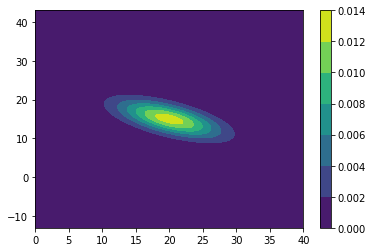

In [45]:
# create a 2d normal with mean [20,15] and covariance [[25,-10],[-10,49]]
# covariance matrix [[25,-10],[-10,49]] means that cov(X1,X1)=var(X1)=25,cov(X2,X2)=var(X2)=49, 
# and cov(X1,X2)=cov(X2,X1)=-10 (hence, we see a "negative slope" in the plot)

mu = np.array([20,15])
cov = np.array([[25,-10],[-10,10]])
my_multi_normal = stats.multivariate_normal(mu,cov)

# create a grid of values where 
# - 1st var (x) varies from 0 to 40 with step 0.05
# - 2nd var (y) varies from -13 to 43 with step 0.05
x,y = np.mgrid[0:40:0.05, -13:43:0.05]
value_grid = np.dstack((x, y))

# compute the corresponding probabilities and
#     plot the pdf using pyplot's contour plot
probs = my_multi_normal.pdf(value_grid)

plt.contourf(x, y, probs)
plt.colorbar()
plt.show()